# Hypothesis Testing
> The role of hypothesis testing is to asssess how significant is the effect caused by treatment

This involves calculating the probability under a given model that an observation equal to or more extreme than what is observed in the treatment group is being obtained, conditioned on the treatment having no effect, i.e. *what is the probability of observing this effect by chance?*
<hr>

**General steps**
1. Determine a model

    &emsp;$X_1, \dots, X_n \sim Ber(p)$ or $Y \sim Poisson(\lambda)$
    <br>

1. Determine a (mutually exclusive) null and alternative hypothesis

    &emsp;Null ($H_0$): &emsp;&emsp;&emsp;&emsp;p = 0.05<br>
    &emsp;Alternative ($H_1$): &nbsp;p > 0.05
    <br>

1. Determine a test statistic (quantity to differentiate hypothesis and whose distribution under $H_0$ can be computed):

    &emsp;$T:=$ Number of deaths under $H_0$<br>
    &emsp;$T \sim Bin(n, 0.05)$
    <br>

1. Determine a significance level ($\alpha$), i.e. the probability of rejecting $H_0$ when $H_0$ is true. A typical value chosen: $\alpha = 0.05$

****

**Errors and its relationships**<br>

**Type I error** ($\alpha$, false +ves): Reject $H_0$ when $H_0$ is actually true<br>
**Type II error** ($\beta$, false -ves): Not reject $H_0$ when $H_1$ is actually true<br>
**Power**: 1 - $\beta$; How well is the experiment able to detect significance when $H_0$ is not true?<br>

- There is a clear trade-off between Type I and II errors; increasing power (i.e. increasing power typically requires a decrease in $\alpha$)
- In the chart below, blue indicates under $\alpha$ and blue+orange indicates power (1 - $\beta$)
- $\therefore \beta$ is the unshaded area under orange

<img alt="P-Value vs Power" src="assets/images_power.png" width="300">

****

**Fisher's Exact Test**<br>
A method based on the hypergeometric distribution - a **discrete** distribution based on the following:

> Suppose there are N balls in a bowl, K of which are red and the remaining N - K of which are blue. From the bowl, n balls are drawn without replacement. What is the probability that among the n balls drawn, exactly x are red?

<img alt="notes-3dd5caf0.png" src="assets/notes-3dd5caf0.png" width="" height="" >

- This test assumes no knowledge on the true probability
- Suppose an experiment with the following parameters:
  - N = 62,000 (control+treatment)
  - K = 31,000 (treatment)
  - M = 102 (control+treatment discrete outcomes, e.g. balls)
  - $T \sim Hypergeometric(62000, 31000, 102)$
  - p-value, $P(T <= t) = \sum_{i = 0}^{t}P(T = i)$ where $t$ is the number of discrete outcomes in treatment group
  
****

**Paired test design**<br>
Involves taking multiple samples from an individual, without splitting a group into control vs treatment - increases the power of the test. Need to ensure that units are blinded from treatment.

In a paired test, it is the difference between pre-post treatment observed values that will be considered.

$Y := X_{post} - X_{pre}$<br>

$H_0: Y = 0$ or $E[Y] = 0$<br>
$H_1: Y > 0$ or $E[Y] > 0$

Test statistic, $T = \frac{\bar{Y_n} - \mu}{\hat{\sigma}/\sqrt{n}} \sim t_{n-1}$<br>

- Since we do not know what is the true population variance, we use an estimator for $\sigma$, where the estimator $\hat{\sigma}$ converges to $\sigma$ asymptotically as n goes to infinity
- When using a small sample and an estimator for the variance, we resort to the **Student's T distribution** as our test statistic
  - Assumes data is Gaussian
  - Check by using a qq-plot or Kolmogorov-Smirnov test
  - Use a non-parametric test (e.g. [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test#Test_procedure)) if data is not Gaussian
  
****

**Likelihood Ratio Test**<br>
The ratio between the likelihood of observing the data given the parameter under the null hypothesis (*there is no difference*) and the MLE.

$L(x) = \frac{\max_{\theta\in\Theta_0 p(x;\theta)}}{\max_{\theta\in\Theta p(x;\theta)}}$
where $\Theta = \Theta_0 \cup \Theta_1$<br>

$L(x) = \frac{p(x;\hat\theta_{MLE}^{constrained})}{p(x;\hat\theta_{MLE}^{\Theta})}$
where $0 <= L(x) <= 1$

We reject the null hypothesis when $L(x) << 1$ which suggests that the null hypothesis is not the best estimator available given the data.

**Wilks Theorem** states that **when the sample size is large** then the test statistic, $\Lambda = -2 \ln(L(x))$, approaches a $\chi^2$ distribution:

$\Lambda \overset{n\to \infty}{\longrightarrow} \chi^2_d$

where $d = \dim(\Theta) - \dim(\Theta_0) > 0$
  - Example: if $\Theta_0$ is a vector with 1 dimension then $\Theta$ is the union of $\Theta_0$, $\Theta_1$ which translates to $\dim(\Theta) = 1+1 = 2$
  - $\therefore d = 2 - 1 = 1$

**Neyman-Pearson Lemma** states that the likelihood ratio test is the most powerful among all level $\alpha$ tests. In fact, t-tests are equivalent to the likelihood ratio test.

<hr>

**Protection against false significance**

Suppose an experiment of 1,000 people with 100 variables measured before and after treatment: *weight, blood pressure, etc.*

We perform hypothesis testing on each variable with a paired t-test of significance level $\alpha$ (e.g. 0.05) then on average $100 \cdot 0.05 = 5$ tests will be falsely significant.

Here we can protect against false significance using these two metrics:
1. **Family-wise error rate (FWER)**: The probability of making at least one false discovery, i.e. type I error
    - $FWER = P(\text{# false significance tests} \geq 1) = 1 - P(\text{# false significance tests} = 0)$
    - $P(\text{test not significant}) = 0.95$
    - $FWER = 1 - 0.95^{100} \approx 0.99$
    - "*If we were to run hypothesis testing for 100 variables at signfiicance level 0.05 then there is a 99% chance that there is at least one experiment that is falsely significant*"
    
    
2. **False discovery rate (FDR)**: The expected fraction of false significance results among all significance results

<hr>

**Correction methods for multiple testing**

1. **Bonferroni correction** (FWER): Reject $H_0$ when $p \leq \frac{\alpha}{m}$ where $m$ is the total # of hypothesis tests performed

    - This implies that $FWER \leq \alpha$, the probability of at least one false significance is limited to $\alpha$
    
    
2. **Holm-Bonferroni correction** (FWER): Sort p-values in increasing order: $p_{(1)} \leq \dots \leq p_{(m)}$ and reject $H_0$ when $(m-i+1) \cdot p_{(i)} \leq \alpha$ (more power than Bonferroni)

    - This implies that $FWER \leq \alpha$
    

3. **Benjamini-Hochberg correction** (FDR): Sort p-values in increasing order: $p_{(1)} \leq \dots \leq p_{(m)}$ and reject $H_0$ when $\frac{m \cdot p_{i}}{i} \leq \alpha$

    - This implies that $FDR \leq \alpha$


**Commonly accepted correction practices**:
  - No correction for multiple testing when generating hypothesis, but report number of tests performed
  - $FDR \leq 10\%$ in exploratory analysis: balances high power and low # of false significance
  - $FWER \leq 5\%$ in confirmatory analysis

<hr>

# Basic code
A `minimal, reproducible example`

In [1]:
# Suppose 61,000 people were split into two groups randomly/equally, 
# 39 people died in treatment and a total of 102 people died
# Is the treatment better than control?

import numpy as np
from scipy.stats import fisher_exact

# Define parameters
N, K, M, t  = 62000, 31000, 102, 39
direction   = 'less'

# Create contigency matrix
table       = np.array(
                       [
                        [t, M-t],
                        [K-t, N-K-(M-t)]
                       ]
                      )

# Run Fisher's Exact test
oddsr, p   = fisher_exact(table, alternative = direction)
print('Fisher, p-value: {:.2f}'.format(p))

Fisher, p-value: 0.01


In [2]:
# Suppose you have a paired test for 10 patients, pre-post medication
# X is an array of difference between observed values of post minus pre
# alternative hypothesis: difference > 0

import numpy as np
from scipy.stats import t, ttest_1samp

X   = np.array([0.9, -0.9, 4.3, 2.9, 1.2, 3.0, 2.7, 0.6, 3.6, -0.5])

# Compute test statistic
t_stat = (np.mean(X) - 0) / np.sqrt((sum([(x - np.mean(X))**2 for x in X])/(len(X)-1))) * np.sqrt(len(X))
dof    = len(X) - 1

# Compute p value
p_value = 1 - t.cdf(t_stat, df = dof)
print('T-test p-value, using CDF: {:.2f}'.format(np.around(p_value, 5)))

# Using ttest_1samp returns two-tailed p-value
t_stat, p_value = ttest_1samp(X, popmean = 0)
print('T-test p-value, using ttest_1samp: {:.2f}'.format(np.around(p_value/2, 5)))

T-test p-value, using CDF: 0.01
T-test p-value, using ttest_1samp: 0.01


KS, p-value: 0.74


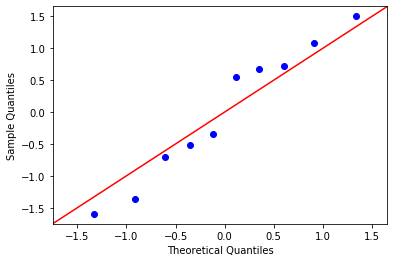

In [4]:
# To check our assumptions that our data is Gaussian before conducting a t-test

# Kolmogorov-Smirnov
from scipy.stats import kstest
stat, p = kstest([(x - np.mean(X)) / np.std(X) for x in X], 'norm')
print('KS, p-value: %.2f' % p)

# QQ-plot (visualization)
import statsmodels.api as sm
from matplotlib import pyplot as plt
sm.qqplot(X, fit = True, line = '45')
plt.show()

In [5]:
# If data is not Gaussian, use a non-parametric test (e.g. Wilcoxon signed rank test)
from scipy.stats import wilcoxon
stat, p = wilcoxon(X, alternative = 'greater')
print('Wilcoxon, p-value: {:.2f}'.format(p))

Wilcoxon, p-value: 0.01


In [6]:
# Likelihood ratio test
# Given control and treatment sizes (both 31,000), the corresponding deaths (63, 39) ~ Bin(n, p)
n0, n1         = 31000, 31000
d0, d1         = 63, 39
p0, p1         = d0/n0, d1/n1
p_constrained  = (d0+d1)/(n0+n1)
dof            = 2-1

# Compute test statistic
import numpy as np
from scipy.stats import binom, chi2

num       = binom.pmf(d0, n0, p_constrained) * binom.pmf(d1, n1, p_constrained) # If null is true, then p_constrained should be a good estimator for both groups
denom     = binom.pmf(d0, n0, p0) * binom.pmf(d1, n1, p1) # MLE estimator for each group
test_stat = -2 * np.log(num/denom)
p_value   = chi2.sf(test_stat, df = dof)

print('Likelihood Ratio Test, p-value: {:.2f}'.format(p_value))

Likelihood Ratio Test, p-value: 0.02
